In [2]:
library(rliger)
# library(liger)
library(Seurat)
packageVersion('Seurat')
# library(Signac)
library(Matrix)
library(patchwork)
# library(EnsDb.Hsapiens.v86)
library(Signac)
packageVersion('Signac')
library(ggplot2)

[1] ‘4.3.0’

[1] ‘1.9.0’

In [25]:
results_dir <- "/home/xcx/results/uterus/7-Seurat"

# counts.rna <- Matrix::readMM("/data1/xcx/unpaired-data/uterus/RNA/raw_highvar_counts_rna.mtx")
counts.rna <- as.matrix(read.csv(file = paste0("/home/xcx/MYBenchmark-codes/7-Seurat/uterus_highvar_counts_rna.csv"), header = TRUE))
counts.rna <- t(as.matrix(counts.rna))
rownames(counts.rna) <- paste("Gene-", seq(1, dim(counts.rna)[1]), sep = "")
colnames(counts.rna) <- paste("Cell-", seq(1, dim(counts.rna)[2]), sep = "")
counts.atac <- Matrix::readMM("/data1/xcx/unpaired-data/uterus/ATAC/uterus_Zhang2021/highvar_counts_atac.mtx")
counts.atac <- t(as.matrix(counts.atac))
rownames(counts.atac) <- paste("Region-", seq(1, dim(counts.atac)[1]), sep = "")
colnames(counts.atac) <- paste("Cell-", seq(dim(counts.rna)[2] + 1, dim(counts.rna)[2] + dim(counts.atac)[2]), sep = "")

region2gene <- Matrix::readMM('/data1/xcx/unpaired-data/uterus/highvar_region2gene.mtx')
# region2gene <- t(as.matrix(region2gene))
rownames(region2gene) <- paste("Region-", seq(1, dim(region2gene)[1]), sep = "")
colnames(region2gene) <- paste("Gene-", seq(1, dim(region2gene)[2]), sep = "")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.0 GiB”


In [27]:
activity.matrix <- t(region2gene) %*% counts.atac

In [28]:
start_time <- proc.time()

seurat.atac <- CreateSeuratObject(counts = counts.atac, assay = "ATAC", project = "scATAC-seq")
seurat.atac$tech <- "atac"

seurat.atac <- RunTFIDF(seurat.atac, verbose = FALSE)
seurat.atac <- FindTopFeatures(seurat.atac, min.cutoff = "q0", verbose = FALSE)
seurat.atac <- RunSVD(seurat.atac, verbose = FALSE)
seurat.atac <- RunUMAP(seurat.atac, reduction = "lsi", dims = 2:30, reduction.name = "umap.atac", reduction.key = "atacUMAP_",  verbose = FALSE)

seurat.atac
head(seurat.atac)
dim(seurat.atac)

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
“Some features contain 0 total counts”


An object of class Seurat 
32524 features across 8314 samples within 1 assay 
Active assay: ATAC (32524 features, 32524 variable features)
 2 dimensional reductions calculated: lsi, umap.atac

,orig.ident,nCount_ATAC,nFeature_ATAC,tech
,<fct>,<dbl>,<int>,<chr>
Cell-8238,scATAC-seq,39,23,atac
Cell-8239,scATAC-seq,58,38,atac
Cell-8240,scATAC-seq,17,11,atac
Cell-8241,scATAC-seq,64,36,atac
Cell-8242,scATAC-seq,42,25,atac
Cell-8243,scATAC-seq,43,29,atac
Cell-8244,scATAC-seq,73,51,atac
Cell-8245,scATAC-seq,71,49,atac
Cell-8246,scATAC-seq,48,30,atac


[1] 32524  8314

In [29]:
# create seurat obj of scRNA-Seq
seurat.rna <- CreateSeuratObject(counts=counts.rna, assay = "RNA", project = "scRNA-seq")
seurat.rna$tech <- "rna"

# preprocessing scRNA-Seq data
seurat.rna[["RNA"]]@counts = apply(seurat.rna[["RNA"]]@counts, c(1, 2), function(x) x+0.5)
seurat.rna <- NormalizeData(seurat.rna, verbose = FALSE)
# select highly variable features, use all features for symsim
seurat.rna <- FindVariableFeatures(seurat.rna, selection.method = "vst", verbose = FALSE)
seurat.rna <- ScaleData(seurat.rna, verbose = FALSE)
seurat.rna <- RunPCA(seurat.rna, verbose = FALSE)
seurat.rna <- RunUMAP(seurat.rna, dims = 1:30, verbose = FALSE)

seurat.rna[["RNA"]]@counts
head(seurat.rna)
dim(seurat.rna)

,Cell-1,Cell-2,Cell-3,Cell-4,Cell-5,Cell-6,Cell-7,Cell-8,Cell-9,Cell-10,⋯,Cell-8228,Cell-8229,Cell-8230,Cell-8231,Cell-8232,Cell-8233,Cell-8234,Cell-8235,Cell-8236,Cell-8237
Gene-1,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000
Gene-2,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,3.655804,0.500000,0.5,0.500000
Gene-3,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000
Gene-4,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000
Gene-5,5.473561,0.500000,0.500000,5.655681,0.500000,0.5,4.338474,0.500000,6.636730,0.5,⋯,0.500000,0.500000,0.500000,0.500000,4.149442,0.5,0.500000,0.500000,0.5,0.500000
Gene-6,0.500000,0.500000,5.066825,0.500000,3.662282,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,4.149442,0.5,3.655804,5.655681,0.5,4.320847
Gene-7,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,4.338474,0.500000,5.542432,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000
Gene-8,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,3.655804,0.500000,0.5,0.500000
Gene-9,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000
Gene-10,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,⋯,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000


,orig.ident,nCount_RNA,nFeature_RNA,tech
,<fct>,<dbl>,<dbl>,<chr>
Cell-1,scRNA-seq,846.0606,1000,rna
Cell-2,scRNA-seq,868.3646,1000,rna
Cell-3,scRNA-seq,703.4402,1000,rna
Cell-4,scRNA-seq,709.9444,1000,rna
Cell-5,scRNA-seq,886.3485,1000,rna
Cell-6,scRNA-seq,647.7584,1000,rna
Cell-7,scRNA-seq,805.2773,1000,rna
Cell-8,scRNA-seq,717.6939,1000,rna
Cell-9,scRNA-seq,675.6187,1000,rna


[1] 1000 8237

In [30]:
png(filename = "/home/xcx/results/uterus/7-Seurat/rna_atac.png", width = 1200, height = 900, res = 300)
    
p1 <- DimPlot(seurat.rna, label = TRUE) + NoLegend() + ggtitle("RNA")
p2 <- DimPlot(seurat.atac, label = TRUE) + NoLegend() + ggtitle("ATAC")
p1 + p2

dev.off()

png 
  2

In [31]:
seurat.atac[["ACTIVITY"]] <- CreateAssayObject(counts = activity.matrix)

# normalize gene activities
DefaultAssay(seurat.atac) <- "ACTIVITY"
seurat.atac <- NormalizeData(seurat.atac)
seurat.atac <- ScaleData(seurat.atac, features = rownames(seurat.atac))

Centering and scaling data matrix



In [32]:
# Identify anchors
transfer.anchors <- FindTransferAnchors(reference = seurat.rna, query = seurat.atac, features = VariableFeatures(object = seurat.rna),
    reference.assay = "RNA", query.assay = "ACTIVITY", reduction = "cca")

Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
“Running CCA on different assays”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 26955 anchors

Filtering anchors

	Retained 1066 anchors



In [33]:
# note that we restrict the imputation to variable genes from scRNA-seq, but could impute the
# full transcriptome if we wanted to
genes.use <- VariableFeatures(seurat.rna)
refdata <- GetAssayData(seurat.rna, assay = "RNA", slot = "data")[genes.use, ]

# refdata (input) contains a scRNA-seq expression matrix for the scRNA-seq cells.  imputation
# (output) will contain an imputed scRNA-seq matrix for each of the ATAC cells
imputation <- TransferData(anchorset = transfer.anchors, refdata = refdata, weight.reduction = seurat.atac[["lsi"]],
    dims = 2:30, verbose = FALSE)
seurat.atac[["RNA"]] <- imputation

coembed <- merge(x  = seurat.rna, y = seurat.atac, verbose = FALSE)

elapsed_time <- proc.time() - start_time

Warning message:
“The following arguments are not used: verbose”


In [16]:
elapsed_time

   user  system elapsed 
511.861 499.047 346.577 

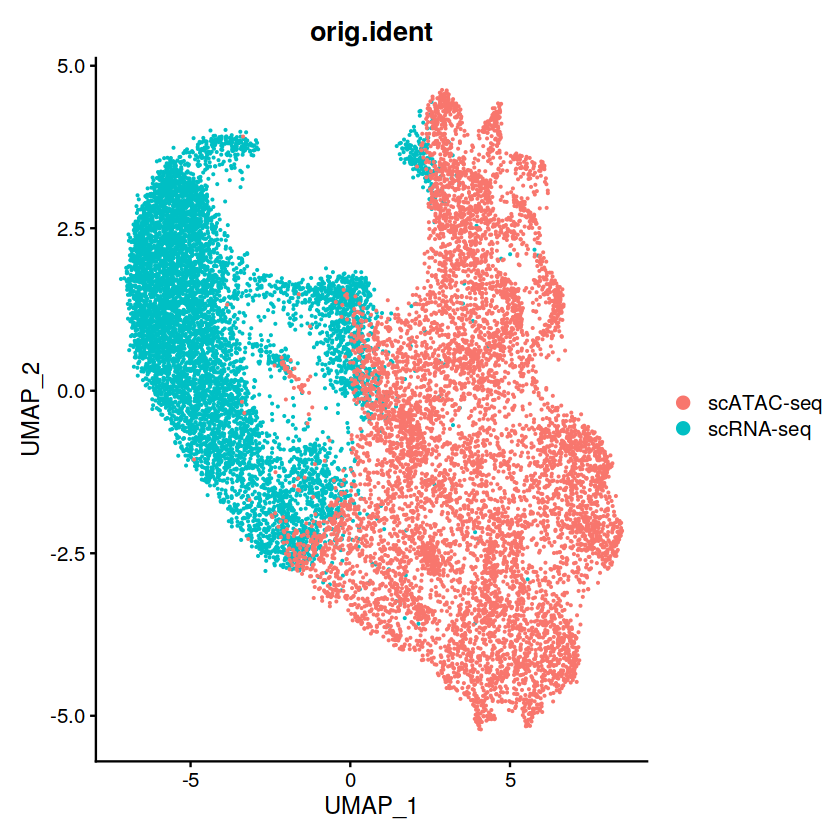

In [34]:
# Finally, we run PCA and UMAP on this combined object, to visualize the co-embedding of both
# datasets
coembed <- ScaleData(coembed, features = genes.use, do.scale = FALSE, verbose = FALSE)
coembed <- RunPCA(coembed, features = genes.use, verbose = FALSE)
coembed <- RunUMAP(coembed, dims = 1:30, verbose = FALSE)

DimPlot(coembed, group.by = c("orig.ident"))

In [35]:
seurat_embeddings <- Embeddings(coembed, 'pca')
seurat_embeddings

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
Cell-1,3.4736678,0.47422794,-1.8596621159,1.43144961,0.9045002,3.46204745,0.10604226,-0.65788343,-0.559604286,0.32848076,⋯,1.47902591,-0.964024643,0.5824791,1.84000441,0.21731499,-1.57203166,0.8328910,-0.63225308,0.27138804,1.270893257
Cell-2,2.6567670,-2.25610695,2.1959502824,0.68869736,-2.0129783,0.29734750,0.75618353,-0.35176663,-0.877821538,1.36627393,⋯,0.37648707,1.653643327,2.2608038,1.55704950,0.11873993,-1.83539313,1.5071541,0.89491262,-0.04340073,0.481956085
Cell-3,-2.1594706,-0.56089865,-1.0078950019,0.61070431,-1.2249036,1.60527643,0.31806621,-0.24929878,-1.748818241,1.16799342,⋯,1.20409798,1.020029337,-0.1195800,-0.83679839,-0.05886906,-0.34230401,0.9928681,-0.07542976,0.81164626,-0.530324759
Cell-4,-1.7923133,0.55500346,2.6386304551,1.28573844,1.0494193,1.28464449,0.79702809,1.58451711,1.579467755,-0.06773133,⋯,0.29603975,-1.573885739,0.4269436,-0.48437131,-1.12776955,0.10852697,-0.4673226,0.52705891,0.29270722,-0.092775671
Cell-5,4.6499653,-1.35930168,3.2534018930,-0.72053035,0.1026523,-1.25930049,-0.06302222,0.17522344,-2.045847768,-0.30553545,⋯,-1.68537639,-0.449778375,1.2319805,-0.92875169,1.04799020,-1.35192359,1.2641553,-0.20643980,0.56807409,0.616909495
Cell-6,-4.9019623,0.51517972,1.4000710096,-0.01393729,1.4532651,-0.19468363,-0.90558512,0.51843038,-0.201595820,-1.55389420,⋯,-0.86731782,-0.011314081,-0.4847037,0.24401617,-0.63240658,-0.15741981,0.5805913,-0.39402518,0.50609359,-0.196211998
Cell-7,1.4221435,0.64503069,-0.3334072376,2.30819363,2.1652335,3.99539438,0.69657610,0.48806914,-1.116923333,-1.53457393,⋯,0.91875671,0.987760234,0.0673502,0.75807639,1.43189425,-0.20394366,-0.4187141,-0.40834863,0.70154784,-0.011517805
Cell-8,-2.0553199,-1.60307522,-0.1987754865,-0.40707668,1.1316040,2.79640172,0.10121428,0.15737585,-1.262143966,0.71392834,⋯,-0.31108987,-0.580382506,-0.9161292,1.20116348,0.32766346,-1.46958103,-0.4568224,0.01943766,0.91311350,0.159349173
Cell-9,-4.2620013,0.81884351,1.2715082955,-0.95675437,2.6249200,0.66964339,-0.99245060,1.14063976,0.538464089,1.31223849,⋯,0.90619399,-0.148778893,0.5943127,-0.25738949,-0.08915372,-0.39353798,-1.1158282,0.06148294,-0.03347354,-1.265975914
Cell-10,-0.4112974,1.28183316,0.5477030034,0.43275597,-0.5971394,2.24406046,-1.68900792,-1.48107950,-0.625447627,0.62117073,⋯,-0.70969409,0.593258751,-0.0701720,0.54298063,1.51476137,-0.66401592,-0.1601470,0.23184678,1.40431411,-0.196163075


In [36]:
library(data.table)
# data_to_write_out <- as.data.frame(as.matrix(coembed[['RNA']]))
data_to_write_out <- as.data.frame(as.matrix(seurat_embeddings[1:dim(counts.rna)[2],]))
fwrite(x = data_to_write_out, file = "/home/xcx/results/uterus/7-Seurat/z_rna-raw.csv")

data_to_write_out <- as.data.frame(as.matrix(seurat_embeddings[(dim(counts.rna)[2]+1):(dim(counts.rna)[2] + dim(counts.atac)[2]),]))
fwrite(x = data_to_write_out, file = "/home/xcx/results/uterus/7-Seurat/z_atac-raw.csv")